In [ ]:
!pip install tensorflow-io[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lb
import librosa.display as lbd

#butterworth
from scipy.signal import butter, sosfilt, sosfreqz # sosfilt, sosfreqz?

#frequency masking
import tensorflow_io as tfio

#shift
import nlpaug.augmenter.audio as naa

In [ ]:
root = '/content/drive/MyDrive/'
audio_root = root + 'processed_audio_files_7sec_22050/'

processed csv data

In [ ]:
processed = pd.read_csv(root + 'processed.csv')
processed.head(20)

Unnamed: 0   start     end  pid mode                      filename  \
0            0   1.862   5.718  160   mc  160_1b3_Al_mc_AKGC417L_0.wav   
1            1   5.718   9.725  160   mc  160_1b3_Al_mc_AKGC417L_1.wav   
2            2   9.725  13.614  160   mc  160_1b3_Al_mc_AKGC417L_2.wav   
3            3  13.614  17.671  160   mc  160_1b3_Al_mc_AKGC417L_3.wav   
4            4  17.671  19.541  160   mc  160_1b3_Al_mc_AKGC417L_4.wav   
5            5   1.862   5.718  160   mc  160_1b3_Pr_mc_AKGC417L_0.wav   
6            6   5.718   9.725  160   mc  160_1b3_Pr_mc_AKGC417L_1.wav   
7            7   9.725  13.614  160   mc  160_1b3_Pr_mc_AKGC417L_2.wav   
8            8  13.614  17.671  160   mc  160_1b3_Pr_mc_AKGC417L_3.wav   
9            9  17.671  19.541  160   mc  160_1b3_Pr_mc_AKGC417L_4.wav   
10          10   1.862   5.718  160   mc  160_1b3_Ar_mc_AKGC417L_0.wav   
11          11   5.718   9.725  160   mc  160_1b3_Ar_mc_AKGC417L_1.wav   
12          12   9.725  13.614  160   mc  160_1b3_Ar_mc_AKGC417L_2.wav   
13          13  13.614  17.671  160   mc  160_1b3_Ar_mc_AKGC417L_3.wav   
14          14  17.671  19.541  160   mc  160_1b3_Ar_mc_AKGC417L_4.wav   
15          15   1.862   5.718  160   mc  160_1b3_Tc_mc_AKGC417L_0.wav   
16          16   5.718   9.725  160   mc  160_1b3_Tc_mc_AKGC417L_1.wav   
17          17   9.725  13.614  160   mc  160_1b3_Tc_mc_AKGC417L_2.wav   
18          18  13.614  17.671  160   mc  160_1b3_Tc_mc_AKGC417L_3.wav   
19          19  17.671  19.541  160   mc  160_1b3_Tc_mc_AKGC417L_4.wav   

   disease  crack_wheeze  
0     COPD             2  
1     COPD             3  
2     COPD             2  
3     COPD             2  
4     COPD             0  
5     COPD             3  
6     COPD             3  
7     COPD             3  
8     COPD             3  
9     COPD             1  
10    COPD             2  
11    COPD             2  
12    COPD             2  
13    COPD             2  
14    COPD             0  
15    COPD             0  
16    COPD             2  
17    COPD             2  
18    COPD             2  
19    COPD             0

zero padded dataset

In [ ]:
audio_file = ['160_1b3_Al_mc_AKGC417L_4.wav', # 0
              '160_1b3_Pr_mc_AKGC417L_4.wav', # 1
              '160_1b3_Al_mc_AKGC417L_0.wav', # 2
              '160_1b3_Al_mc_AKGC417L_1.wav' # 3
              ]

In [ ]:
audio_file[0]

'160_1b3_Al_mc_AKGC417L_4.wav'

In [ ]:
sr=16000
zero_sound = []

for idx in range(len(audio_file)):
    audio = audio_root + audio_file[idx]
    sound, _ = lb.load(audio, sr=sr)
    zero_sound.append(sound)

# butterworth

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], analog=False, btype='band', output='sos')
    return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y

In [ ]:
sr = 16000
butter_filtered = []

for idx in range(len(zero_sound)):
    filtered = butter_bandpass_filter(zero_sound[idx], 100, 2500, 16000, order=5)
    butter_filtered.append(filtered)

In [ ]:
np.min(butter_filtered[1])

-0.2067824909505736

In [ ]:
len(butter_filtered)

8

In [ ]:
np.save('/content/drive/MyDrive/hack/preprocessing_test_np/butter_filtered', butter_filtered)

In [ ]:
butter_filtered_load = np.load('/content/drive/MyDrive/hack/preprocessing_test_np/butter_filtered.npy')

# normalization
librosa로 wav 불러오면 -1~1로 기본으로 가져와서 굳이 안해줘도 됨

In [ ]:
'''
def normalization(x):
    return [2 * (num-np.min(x)) / (np.max(x) - np.min(x)) - 1]
    '''

'\ndef normalization(x):\n    return [2 * (num-np.min(x)) / (np.max(x) - np.min(x)) - 1]\n    '

In [ ]:
'''
filtered_normalized = []

for i in range(len(butter_filtered)):
    normal = normalization(butter_filtered[i])
    filtered_normalized.append(normal)
    '''

'\nfiltered_normalized = []\n\nfor i in range(len(butter_filtered)):\n    normal = normalization(butter_filtered[i])\n    filtered_normalized.append(normal)\n    '

In [ ]:
'''
np.max(filtered_normalized[1])
'''

'\nnp.max(filtered_normalized[1])\n'

In [ ]:
# os.makedirs('/content/drive/MyDrive/hack/preprocessing_test_np')

In [ ]:
# np.save('/content/drive/MyDrive/hack/preprocessing_test_np/filtered_normalized', filtered_normalized)

In [ ]:
'''
filtered_normalized_load = np.load('/content/drive/MyDrive/hack/preprocessing_test_np/filtered_normalized.npy')'''


"\nfiltered_normalized_load = np.load('/content/drive/MyDrive/hack/preprocessing_test_np/filtered_normalized.npy')"

In [ ]:
# len(filtered_normalized_load)

In [ ]:
# filtered_normalized = np.array(filtered_normalized)

# mSpec

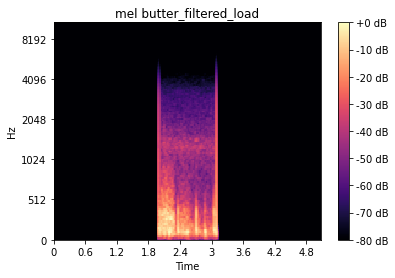

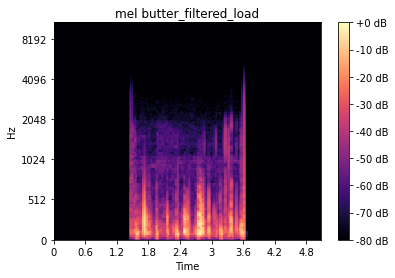

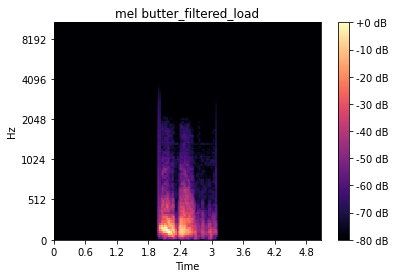

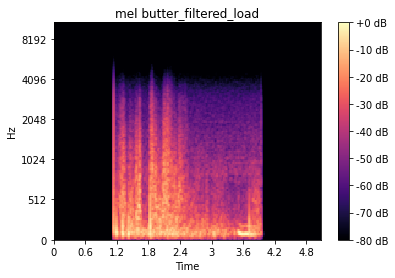

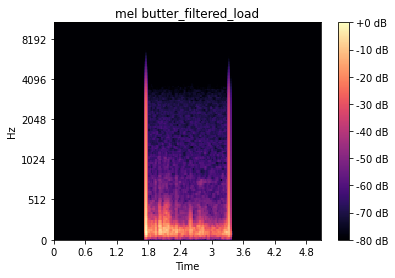

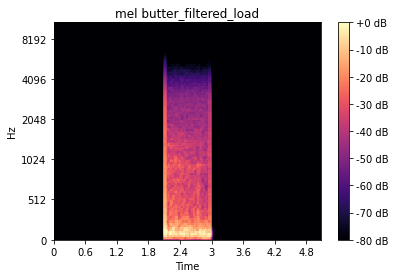

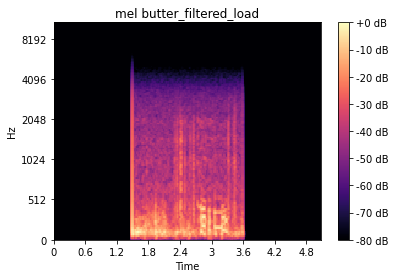

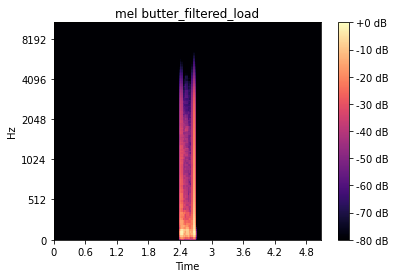

In [ ]:
mSpec_list = []
for idx in range(len(butter_filtered_load)):
    fig, ax = plt.subplots()
    M = lb.feature.melspectrogram(y=butter_filtered_load[idx], sr=16000)
    M_db = lb.power_to_db(M, ref=np.max)
    mSpec_list.append(M_db)
    
    img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
    ax.set(title='mel butter_filtered_load')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    fig.savefig(f'./mSpec:{idx}')

# Frequency Masking
- randomly mask out a range of consecutive frequencies by adding vertical bars on the spectrogram.
- y축 뒤집기는 플롯만 하는 것!?! -> 
- 범위 지정하는 방법 ->


In [ ]:
def freq_mask(signal, param):
    M = lb.feature.melspectrogram(y=signal, sr=sr)
    M_db = lb.power_to_db(M, ref=np.max)    
    return tfio.audio.freq_mask(M_db, param)

In [ ]:
signal = butter_filtered_load[0]
signal

array([ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
       -2.10973850e-220, -2.16209202e-220, -2.20992748e-220])

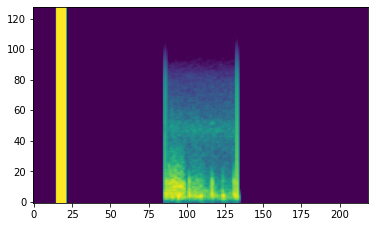

In [ ]:
test1 = freq_mask(signal, 60)

plt.figure()
ax1 = plt.imshow(test1)
plt.gca().invert_yaxis() # y축(time) 뒤집기 -> 실제로 데이터가 뒤집히는 것은 아님.

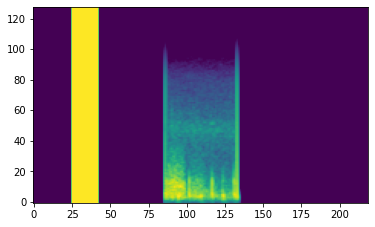

In [ ]:
test1 = freq_mask(signal, 60)

plt.figure()
plt.imshow(test1)
plt.gca().invert_yaxis() 

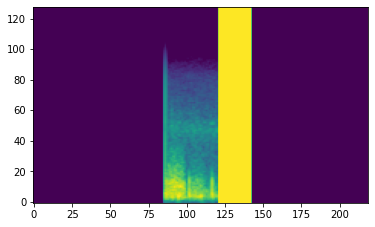

In [ ]:
test1 = freq_mask(signal, 60)

plt.figure()
plt.imshow(test1)
plt.gca().invert_yaxis() 

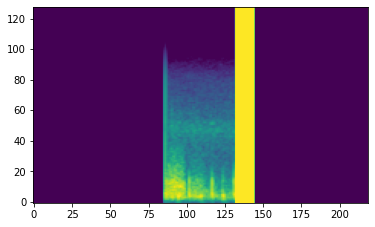

In [ ]:
test1 = freq_mask(signal, 60)

plt.figure()
plt.imshow(test1)
plt.gca().invert_yaxis() 

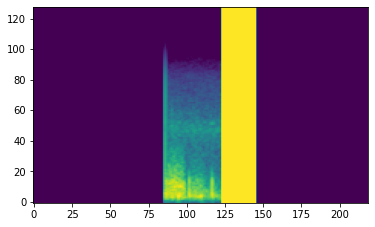

In [ ]:
test1 = freq_mask(signal, 35)

plt.figure()
plt.imshow(test1)
plt.gca().invert_yaxis()

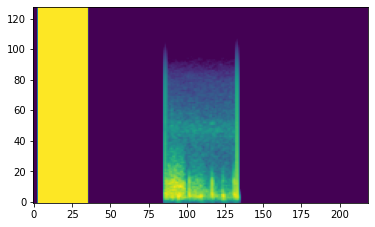

In [ ]:
test1 = freq_mask(signal, 35)

plt.figure()
plt.imshow(test1)
plt.gca().invert_yaxis() 

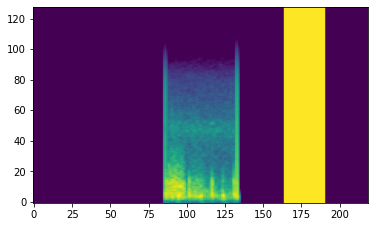

In [ ]:
test1 = freq_mask(signal, 35)

plt.figure()
plt.imshow(test1)
plt.gca().invert_yaxis()

In [ ]:
test1 = freq_mask(signal, 30)
test1

<tf.Tensor: shape=(128, 219), dtype=float64, numpy=
array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]])>

In [ ]:
np.max(test1)

0.0

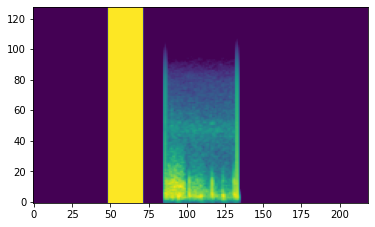

In [ ]:
freq_m = tfio.audio.freq_mask(mSpec_list[0], param=30 )
# freq_m = tfio.audio.time_mask(mSpec_list[0], param=10 )
plt.figure()
plt.imshow(freq_m.numpy())
plt.gca().invert_yaxis() # y축 뒤집기

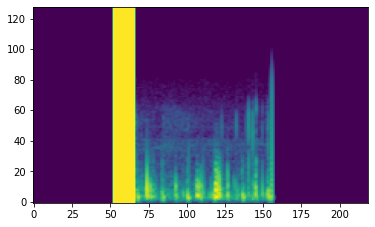

In [ ]:
freq_m = tfio.audio.freq_mask(mSpec_list[1], param=60 )

plt.figure()
plt.imshow(freq_m.numpy())
plt.gca().invert_yaxis() # y축 뒤집기

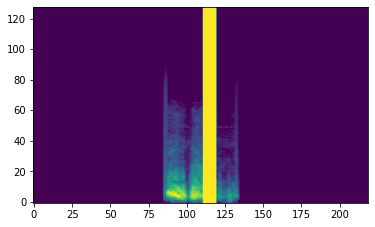

In [ ]:
freq_m = tfio.audio.freq_mask(mSpec_list[2], param=30 )

plt.figure()
plt.imshow(freq_m.numpy())
plt.gca().invert_yaxis() # y축 뒤집기

In [ ]:
signal2 = butter_filtered_load[0]
signal2

array([ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
       -2.10973850e-220, -2.16209202e-220, -2.20992748e-220])

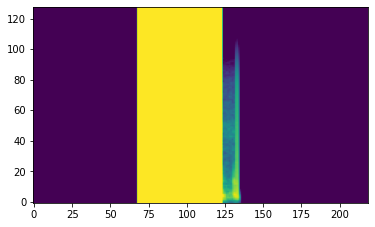

In [ ]:
test1 = freq_mask(signal2, 60)

plt.figure()
ax1 = plt.imshow(test1)
plt.gca().invert_yaxis() # y축(time) 뒤집기

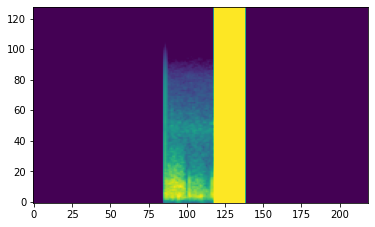

In [ ]:
test1 = freq_mask(signal2, 60)

plt.figure()
ax1 = plt.imshow(test1)
plt.gca().invert_yaxis() # y축(time) 뒤집기

# Time mask


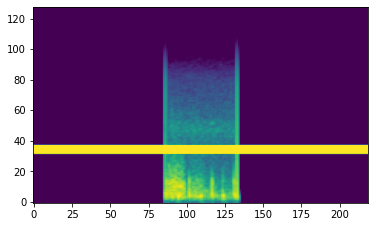

In [ ]:
freq_m = tfio.audio.time_mask(mSpec_list[0], param=30)
plt.figure()
plt.imshow(freq_m.numpy())
plt.gca().invert_yaxis() # y축 뒤집기

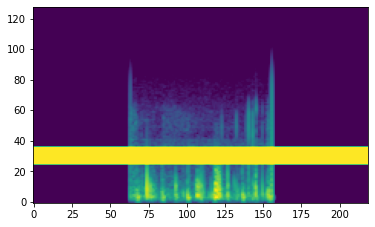

In [ ]:
freq_m = tfio.audio.time_mask(mSpec_list[1], param=30)
plt.figure()
plt.imshow(freq_m.numpy())
plt.gca().invert_yaxis() # y축 뒤집기

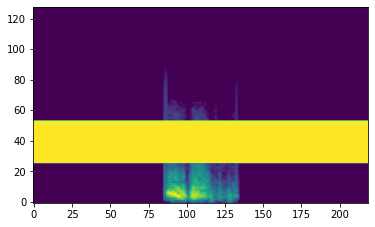

In [ ]:
freq_m = tfio.audio.time_mask(mSpec_list[2], param=30)
plt.figure()
plt.imshow(freq_m.numpy())
plt.gca().invert_yaxis() # y축 뒤집기

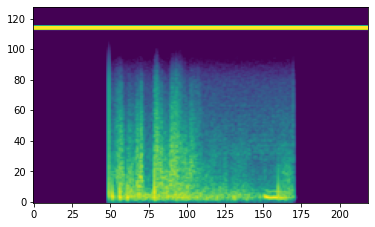

In [ ]:
freq_m = tfio.audio.time_mask(mSpec_list[3], param=30)
plt.figure()
plt.imshow(freq_m.numpy())
plt.gca().invert_yaxis() # y축 뒤집기

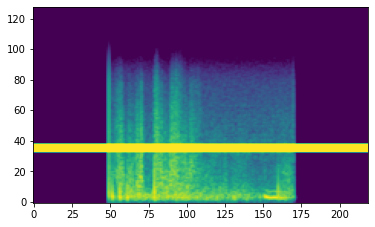

In [ ]:
freq_m = tfio.audio.time_mask(mSpec_list[3], param=15)
plt.figure()
plt.imshow(freq_m.numpy())
plt.gca().invert_yaxis() # y축 뒤집기

# time_stretch
speedaug


In [ ]:
def time_stretch(signal, stretch_rate):
    return lb.effects.time_stretch(signal, stretch_rate)

In [ ]:
stretched = time_stretch(butter_filtered_load[0], 0.5) # healthy

In [ ]:
type(stretched)

numpy.ndarray

In [ ]:
import soundfile as sf
sf.write('stretched.wav', stretched, sr)

In [ ]:
import IPython.display as ipd
ipd.Audio('stretched.wav')

TypeError: ignored

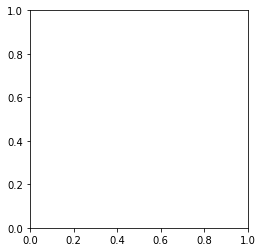

In [ ]:
# test1 = freq_mask(signal, 60)

plt.figure()
plt.imshow(stretched)
plt.gca().invert_yaxis() # y축 뒤집기

In [ ]:
shortened = time_stretch(butter_filtered_load[0], 1.5)
sf.write('shortened.wav', shortened, sr)

In [ ]:
ipd.Audio('shortened.wav')

In [ ]:
stretched

array([ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
       -2.72386171e-220, -2.62200808e-220, -2.52131971e-220])

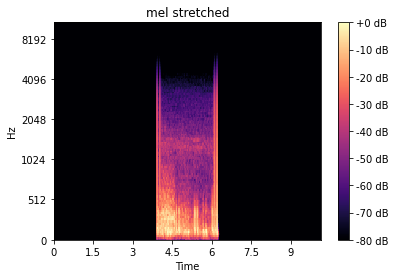

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=stretched, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel stretched')
fig.colorbar(img, ax=ax, format="%+2.f dB")

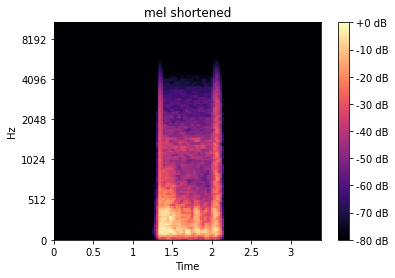

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=shortened, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel shortened')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
stretched_Bronchiolitis = time_stretch(butter_filtered_load[1], 0.5) # Bronchiolitis
sf.write('stretched_Bronchiolitis.wav', stretched_Bronchiolitis, sr)
ipd.Audio('stretched_Bronchiolitis.wav')

In [ ]:
shortened_Bronchiolitis = time_stretch(butter_filtered_load[1], 1.5)
sf.write('shortened_Bronchiolitis.wav', shortened_Bronchiolitis, sr)
ipd.Audio('shortened_Bronchiolitis.wav')

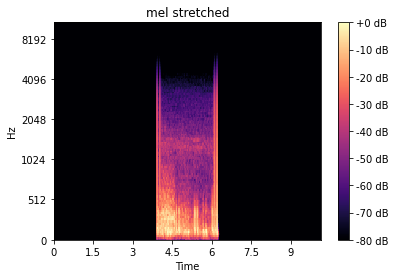

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=stretched, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel stretched')
fig.colorbar(img, ax=ax, format="%+2.f dB")

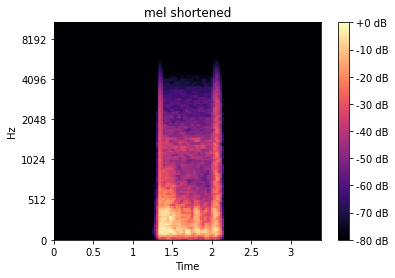

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=shortened, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel shortened')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
stretched_URTI = time_stretch(butter_filtered_load[2], 0.5) # URTI
sf.write('stretched_URTI.wav', stretched, sr)
ipd.Audio('stretched_URTI.wav')

In [ ]:
shortened_URTI = time_stretch(butter_filtered_load[2], 1.5)
sf.write('shortened_URTI.wav', shortened_URTI, sr)
ipd.Audio('shortened_URTI.wav')

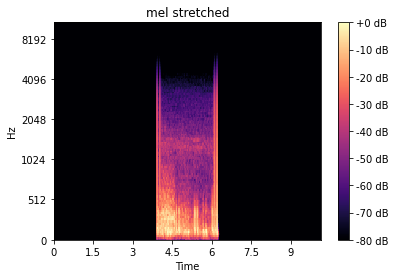

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=stretched, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel stretched')
fig.colorbar(img, ax=ax, format="%+2.f dB")

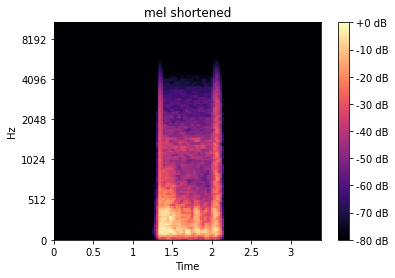

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=shortened, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel shortened')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
stretched_COPD = time_stretch(butter_filtered_load[3], 0.5) # COPD
sf.write('stretched_COPD.wav', stretched_COPD, sr)
ipd.Audio('stretched_COPD.wav')

In [ ]:
shortened_COPD = time_stretch(butter_filtered_load[3], 1.5)
sf.write('shortened_COPD.wav', shortened_COPD, sr)
ipd.Audio('shortened_COPD.wav')

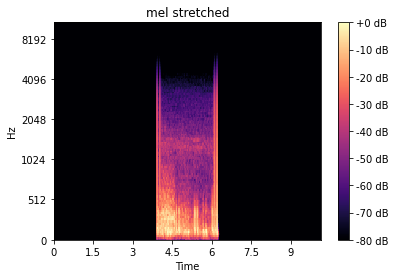

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=stretched, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel stretched')
fig.colorbar(img, ax=ax, format="%+2.f dB")

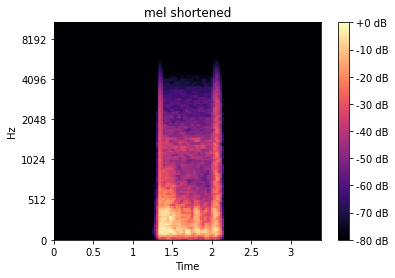

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=shortened, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel shortened')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
stretched_Pneumonia = time_stretch(butter_filtered_load[4], 0.5) # Pneumonia
sf.write('stretched_Pneumonia.wav', stretched_Pneumonia, sr)
ipd.Audio('stretched_Pneumonia.wav')

In [ ]:
shortened_Pneumonia = time_stretch(butter_filtered_load[4], 1.5) 
sf.write('shortened_Pneumonia.wav', shortened_Pneumonia, sr)
ipd.Audio('shortened_Pneumonia.wav')

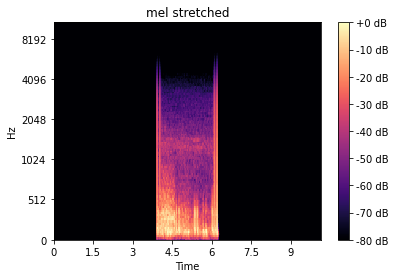

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=stretched, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel stretched')
fig.colorbar(img, ax=ax, format="%+2.f dB")

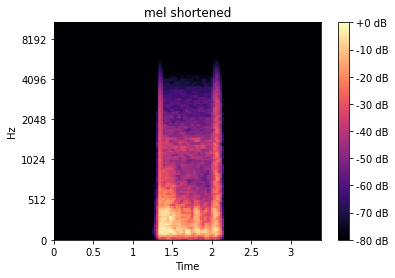

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=shortened, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel shortened')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
stretched_Bronchiectasis = time_stretch(butter_filtered_load[5], 0.5) # Bronchiectasis
sf.write('stretched_Bronchiectasis.wav', stretched, sr)
ipd.Audio('stretched_Bronchiectasis.wav')

In [ ]:
shortened_Bronchiectasis = time_stretch(butter_filtered_load[5], 1.5) 
sf.write('shortened_Bronchiectasis.wav', shortened_Bronchiectasis, sr)
ipd.Audio('shortened_Bronchiectasis.wav')

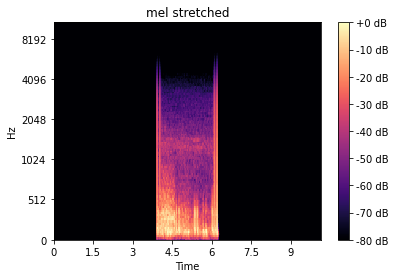

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=stretched, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel stretched')
fig.colorbar(img, ax=ax, format="%+2.f dB")

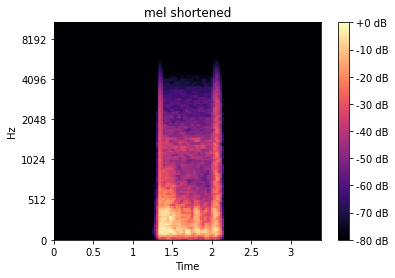

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=shortened, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel shortened')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
stretched_Asthma = time_stretch(butter_filtered_load[6], 0.5) # Asthma
sf.write('stretched_Asthma.wav', stretched_Asthma, sr)
ipd.Audio('stretched_Asthma.wav')

In [ ]:
stretched_Asthma = time_stretch(butter_filtered_load[6], 1.5) 
sf.write('stretched_Asthma.wav', stretched_Asthma, sr)
ipd.Audio('stretched_Asthma.wav')

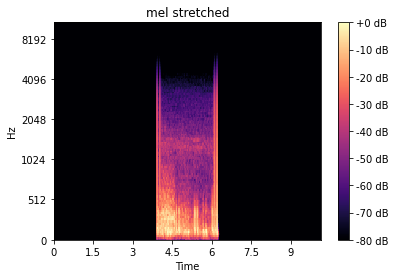

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=stretched, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel stretched')
fig.colorbar(img, ax=ax, format="%+2.f dB")

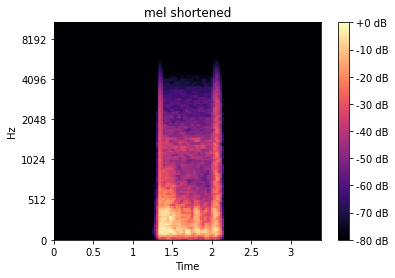

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=shortened, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel shortened')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
stretched_LRTI = time_stretch(butter_filtered_load[7], 0.5) # LRTI
sf.write('stretched_LRTI.wav', stretched_LRTI, sr)
ipd.Audio('stretched_LRTI.wav')

In [ ]:
shortened_LRTI = time_stretch(butter_filtered_load[7], 1.5) # LRTI
sf.write('shortened_LRTI.wav', shortened_LRTI, sr)
ipd.Audio('shortened_LRTI.wav')

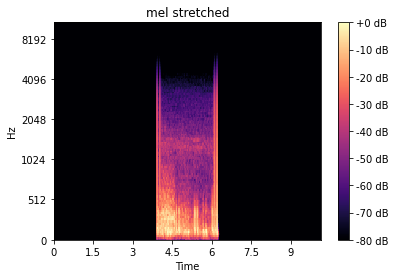

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=stretched, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel stretched')
fig.colorbar(img, ax=ax, format="%+2.f dB")

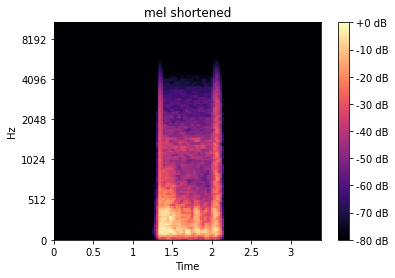

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=shortened, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel shortened')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
''' audio_file = ['102_1b1_Ar_sc_Meditron_10.wav', # Healthy
              '161_1b1_Al_sc_Meditron_0.wav', # Bronchiolitis
              '164_1b1_Ll_sc_Meditron_0.wav', # URTI
              '160_1b3_Al_mc_AKGC417L_0.wav', # COPD
              '191_2b1_Pl_mc_LittC2SE_0.wav', # Pneumonia
              '215_1b2_Ar_sc_Meditron_0.wav', # Bronchiectasis 
              '103_2b2_Ar_mc_LittC2SE_0.wav', # Asthma
              '115_1b1_Ar_sc_Meditron_0.wav'] # LRTI
              '''

" audio_file = ['102_1b1_Ar_sc_Meditron_10.wav', # Healthy\n              '161_1b1_Al_sc_Meditron_0.wav', # Bronchiolitis\n              '164_1b1_Ll_sc_Meditron_0.wav', # URTI\n              '160_1b3_Al_mc_AKGC417L_0.wav', # COPD\n              '191_2b1_Pl_mc_LittC2SE_0.wav', # Pneumonia\n              '215_1b2_Ar_sc_Meditron_0.wav', # Bronchiectasis \n              '103_2b2_Ar_mc_LittC2SE_0.wav', # Asthma\n              '115_1b1_Ar_sc_Meditron_0.wav'] # LRTI\n              "

# pitch shift

In [ ]:
def pitch_shift(signal, sr, num_semitones):
    return lb.effects.pitch_shift(signal, sr, num_semitones)

In [ ]:
pitch_scaled = pitch_shift(butter_filtered_load[0], sr, 1)
sf.write('pitch_scaled.wav', pitch_scaled, sr)

In [ ]:
ipd.Audio('pitch_scaled.wav')

In [ ]:
pitch_scaled = pitch_shift(butter_filtered_load[0], sr, 2)
sf.write('pitch_scaled_2.wav', pitch_scaled, sr)

In [ ]:
ipd.Audio('pitch_scaled_2.wav')

In [ ]:
pitch_scaled = pitch_shift(butter_filtered_load[0], sr, 3)
sf.write('pitch_scaled_3.wav', pitch_scaled, sr)

In [ ]:
ipd.Audio('pitch_scaled_3.wav')

In [ ]:
pitch_scaled = pitch_shift(butter_filtered_load[0], sr, 6)
sf.write('pitch_scaled_6.wav', pitch_scaled, sr)

In [ ]:
ipd.Audio('pitch_scaled_6.wav')

In [ ]:
pitch_scaled = pitch_shift(butter_filtered_load[0], sr, 12)
sf.write('pitch_scaled_12.wav', pitch_scaled, sr)

In [ ]:
ipd.Audio('pitch_scaled_12.wav')

In [ ]:
pitch_scaled = pitch_shift(butter_filtered_load[0], sr, 24)
sf.write('pitch_scaled_24.wav', pitch_scaled, sr)

In [ ]:
ipd.Audio('pitch_scaled_24.wav')

클래스 별로 들어보자

NameError: ignored

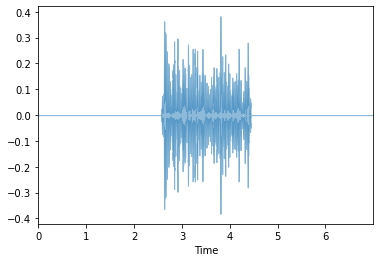

In [ ]:
sig = zero_sound[1]
lbd.waveplot(sig, sr=sr, alpha=0.5)
lbd.waveplot(augmented_data, sr=sr, color='r', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
'''
plt.figure(figsize=(10,5))
lbd.waveplot(zero_sound[1], sr, alpha=0.5)
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.title("waveform")

In [ ]:
# ipd.Audio('/content/drive/MyDrive/hack/processed_audio_files_7sec_22050/102_1b1_Ar_sc_Meditron_10.wav')

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=pitch_scaled, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel pitch')
fig.colorbar(img, ax=ax, format="%+2.f dB")

shift augmentation

In [ ]:
sig = zero_sound[1]

In [ ]:
aug = naa.ShiftAug(sampling_rate=sr, direction='random') 
augmented_data = aug.augment(sig)

lbd.waveplot(sig, sr=sr, alpha=0.5)
lbd.waveplot(augmented_data, sr=sr, color='r', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
def audio_shift(signal, sr):
    aug = naa.ShiftAug(sampling_rate=sr, duration=1)
    return aug.augment(signal)

In [ ]:
test = audio_shift(sig, sr)

lbd.waveplot(test, sr=sr, color='r', alpha=0.5)
lbd.waveplot(sig, sr=sr, alpha=0.5)

In [ ]:
aug = naa.ShiftAug(sampling_rate=sr, duration=1, direction='random')
augmented_data = aug.augment(sig)

lbd.waveplot(sig, sr=sr, alpha=0.5)
lbd.waveplot(augmented_data, sr=sr, color='r', alpha=0.5)

plt.tight_layout()
plt.show()

waveform 시각화

In [ ]:
plt.figure(figsize=(10,5))
lbd.waveplot(zero_sound[1], sr, alpha=0.5)
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.title("waveform")

단순 푸리에 변환 -> Spectrum

In [ ]:
fft = np.fft.fft(sig)

#복소공간 값 절대값 취해서 magnitude
magnitude = np.abs(fft) 

#Frequency 값
f = np.linspace(0, sr, len(magnitude))

left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(10,5))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

STFT -> Spectrogram

Spectrogram 에서는 푸리에 변환의 결과인 magnitude에 로그 scaling을 통해 dB로 변환

In [ ]:
#STFT -> spectrogram
hop_length = 512
n_fft = 2048

#calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

#STFT
stft = lb.stft(sig, n_fft=n_fft, hop_length=hop_length)

#복소공간 값 절대값 취하기
magnitude = np.abs(stft)

#magnitude to dB
log_spectrogram = lb.amplitude_to_db(magnitude)

#display
plt.figure(figsize=(10,5))
lbd.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%2.0f dB")
plt.title("Spectrogram(dB)")

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=sig, sr=16000)
M_db = lb.power_to_db(M, ref=np.max)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
fig, ax = plt.subplots()
M = lb.feature.melspectrogram(y=sig, sr=16000)
M_db = lb.power_to_db(M, ref=np.median)

img = lbd.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='mel spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")